In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SVXq_bfrOgTQCmWbTj3oJ8bCMFDGASnIK5lL7Esu1AYu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'postthoracic-donotdelete-pr-gq10xslv9un9id'
object_key = 'ThoracicSurgery.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
!pip install numpy

In [2]:
!pip install pandas

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pickle-mixin

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import itertools

In [10]:
df.columns

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age', 'Death_1yr'],
      dtype='object')

In [11]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [12]:
live = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]

cond = ['FVC','FEV1','Performance','Pain','Haemoptysis','Dyspnoea','Cough','Weakness',\
       'Tumor_Size','Diabetes_Mellitus','MI_6mo','PAD','Smoking','Asthma','Age']

l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute':cond,'Live 1yr Mean': l,'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death:{:d},Live:{:d}'.format(len(death),len(live)))
print("1 year death:{:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld


Death:69,Live:385
1 year death:15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


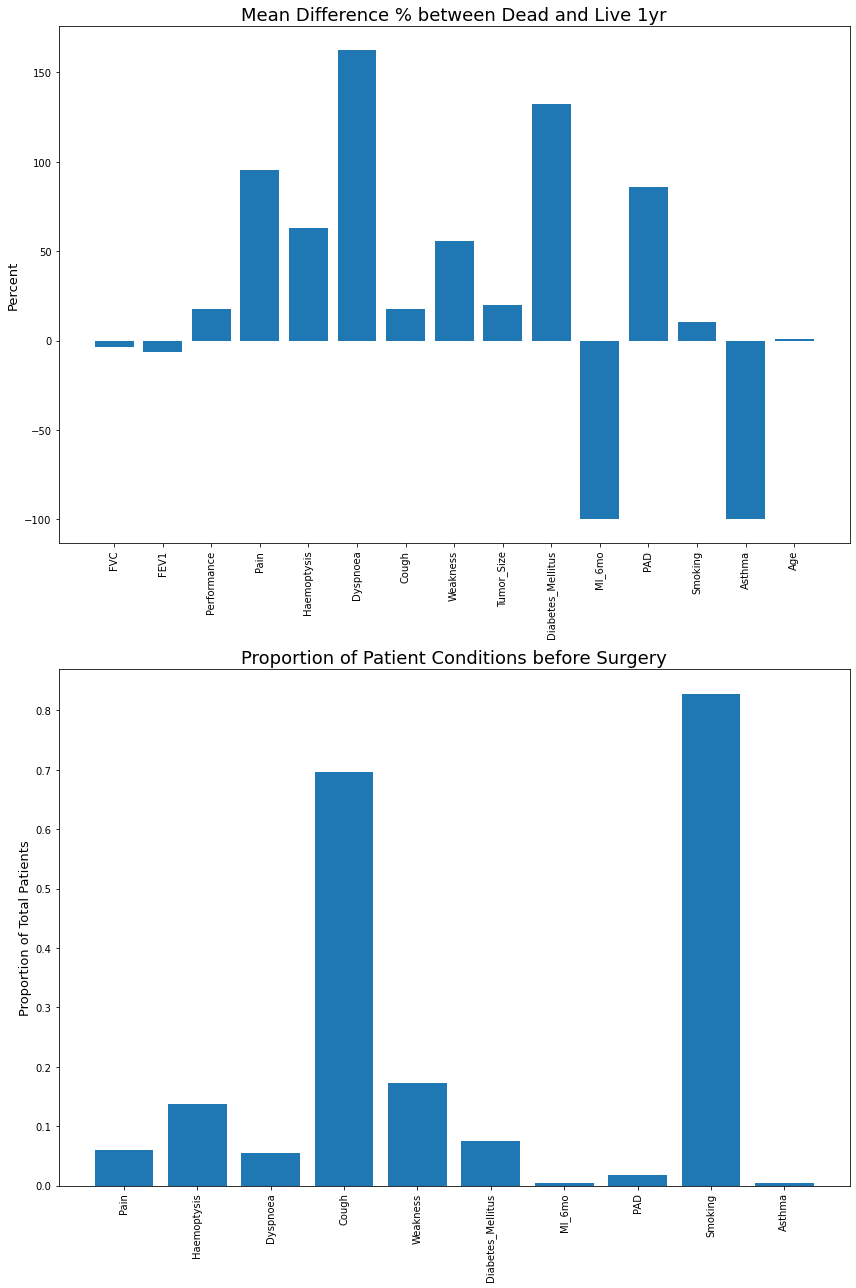

In [13]:
d= np.array(d)
l = np.array(l)
p_diff =(d-l)/l*100
fig, axes = plt.subplots(2,1,figsize=(12,18))
axes[0].bar(cond,p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)
tf_col = ['Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Diabetes_Mellitus','MI_6mo','PAD','Smoking','Asthma']
tf_sum = [df[col].sum()/454 for col in tf_col]
axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation = 90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize =18)
plt.tight_layout()

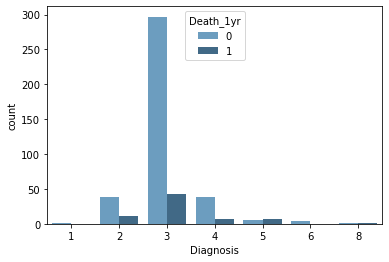

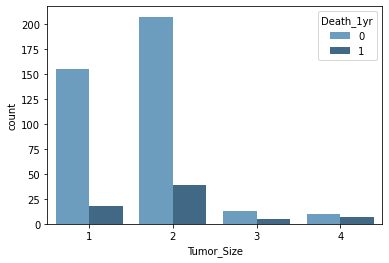

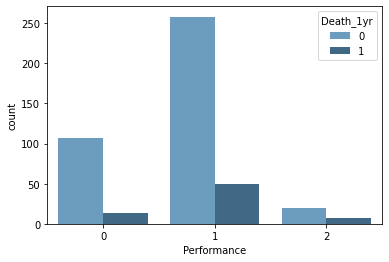

In [14]:
 import seaborn as sns  
sns.countplot(x='Diagnosis',hue='Death_1yr',data=df,palette='Blues_d')  
plt.show() 
sns.countplot(x='Tumor_Size',hue='Death_1yr',data=df,palette='Blues_d')  
plt.show() 
sns.countplot(x='Performance',hue='Death_1yr',data=df,palette='Blues_d')  
plt.show() 


In [15]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [16]:
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
             'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val = []

for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)

print(list(zip(condition, p_val)))

[('FVC', 0.1623), ('FEV1', 0.0577), ('Performance', 0.0306), ('Pain', 0.0976), ('Haemoptysis', 0.0627), ('Dyspnoea', 0.0229), ('Cough', 0.0325), ('Weakness', 0.0594), ('Tumor_Size', 0.0003), ('Diabetes_Mellitus', 0.0211), ('MI_6mo', 0.7216), ('PAD', 0.3462), ('Smoking', 0.0608), ('Asthma', 0.7248), ('Age', 0.2713)]


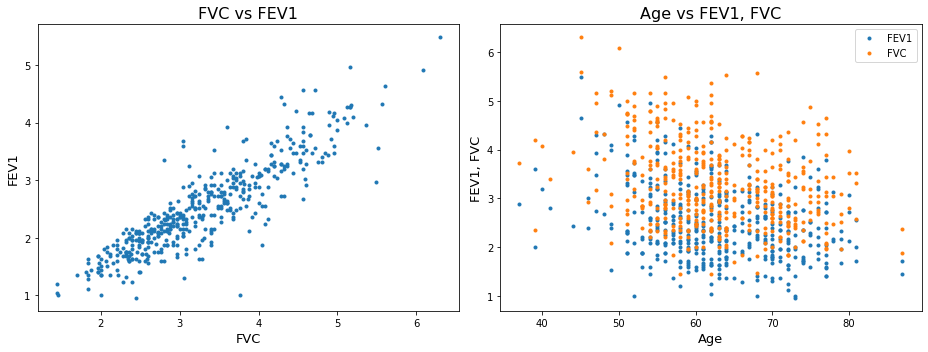

In [17]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()

In [18]:
np.corrcoef(df.FVC, df.FEV1)[0,1]

0.8875452733829001

In [19]:
np.corrcoef(df.Age, df.FVC)[0,1]

-0.2994299196604911

In [20]:
np.corrcoef(df.Age, df.FEV1)[0,1]

-0.30961662730798917

In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)    
    x = np.sort(data)    
    y = np.arange(1, n+1) / n    
    return x, y

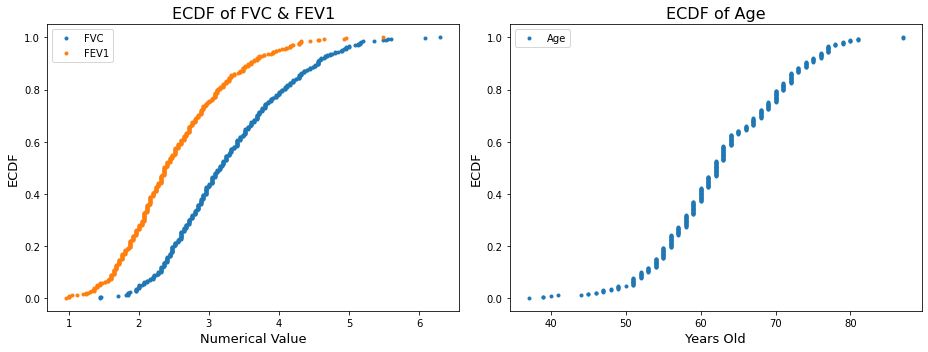

In [22]:
x_fvc, y_fvc = ecdf(df.FVC)
x_fev1, y_fev1 = ecdf(df.FEV1)
x_age, y_age = ecdf(df.Age)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(x_fvc, y_fvc, marker='.', linestyle='none', label='FVC')
axes[0].plot(x_fev1, y_fev1, marker='.', linestyle='none', label='FEV1')

axes[0].set_xlabel('Numerical Value', fontsize=13)
axes[0].set_ylabel('ECDF', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].set_title('ECDF of FVC & FEV1', fontsize=16)

axes[1].plot(x_age, y_age, marker='.', linestyle='none', label='Age')
axes[1].set_xlabel('Years Old', fontsize=13)
axes[1].set_ylabel('ECDF', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].set_title('ECDF of Age', fontsize=16)
plt.tight_layout()

In [23]:
df.shape

(454, 17)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          454 non-null    int64  
 1   FVC                454 non-null    float64
 2   FEV1               454 non-null    float64
 3   Performance        454 non-null    int64  
 4   Pain               454 non-null    int64  
 5   Haemoptysis        454 non-null    int64  
 6   Dyspnoea           454 non-null    int64  
 7   Cough              454 non-null    int64  
 8   Weakness           454 non-null    int64  
 9   Tumor_Size         454 non-null    int64  
 10  Diabetes_Mellitus  454 non-null    int64  
 11  MI_6mo             454 non-null    int64  
 12  PAD                454 non-null    int64  
 13  Smoking            454 non-null    int64  
 14  Asthma             454 non-null    int64  
 15  Age                454 non-null    int64  
 16  Death_1yr          454 non

In [25]:
df.isnull().sum()

Diagnosis            0
FVC                  0
FEV1                 0
Performance          0
Pain                 0
Haemoptysis          0
Dyspnoea             0
Cough                0
Weakness             0
Tumor_Size           0
Diabetes_Mellitus    0
MI_6mo               0
PAD                  0
Smoking              0
Asthma               0
Age                  0
Death_1yr            0
dtype: int64

In [26]:
df.drop(['FVC'],axis=1,inplace=True)

In [27]:
x=df.iloc[:,0:15].values
y=df.iloc[:,15:16].values

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
print("Shape of x_train {}".format(x_train.shape))
print("Shape of y_train {}".format(y_train.shape))
print("Shape of x_test {}".format(x_test.shape))
print("Shape of y_test {}".format(y_test.shape))

Shape of x_train (363, 15)
Shape of y_train (363, 1)
Shape of x_test (91, 15)
Shape of y_test (91, 1)


In [30]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [31]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt= DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print (confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test, yPred))

In [32]:
decisionTree(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[58 16]
 [12  5]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        74
           1       0.24      0.29      0.26        17

    accuracy                           0.69        91
   macro avg       0.53      0.54      0.53        91
weighted avg       0.72      0.69      0.70        91



In [33]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [34]:
randomForest(x_train, x_test, y_train, y_test)

***RandomForestClassifier***
Confusion matrix
[[74  0]
 [17  0]]
Classification report
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        74
           1       0.00      0.00      0.00        17

    accuracy                           0.81        91
   macro avg       0.41      0.50      0.45        91
weighted avg       0.66      0.81      0.73        91



/tmp/wsuser/ipykernel_580/2273288791.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

In [35]:
def KNN(x_train, x_test, y_train, y_test): 
    knn = KNeighborsClassifier() 
    knn.fit(x_train, y_train) 
    yPred = knn.predict(x_test) 
    print('KNeighboursClassifier') 
    print('Confusion matrix') 
    print(confusion_matrix(y_test,yPred)) 
    print('Classification report') 
    print(classification_report(y_test,yPred))

In [36]:
KNN(x_train, x_test, y_train, y_test)

KNeighboursClassifier
Confusion matrix
[[72  2]
 [16  1]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        74
           1       0.33      0.06      0.10        17

    accuracy                           0.80        91
   macro avg       0.58      0.52      0.49        91
weighted avg       0.73      0.80      0.74        91



/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [37]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('*** GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classifier report')
    print(classification_report(y_test,yPred))

In [38]:
xgboost(x_train, x_test, y_train, y_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** GradientBoostingClassifier***
Confusion matrix
[[71  3]
 [16  1]]
Classifier report
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        74
           1       0.25      0.06      0.10        17

    accuracy                           0.79        91
   macro avg       0.53      0.51      0.49        91
weighted avg       0.71      0.79      0.74        91



In [39]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)
    print('-'*100)

In [40]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[60 14]
 [12  5]]
Classification report


/tmp/wsuser/ipykernel_580/2273288791.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       0.83      0.81      0.82        74
           1       0.26      0.29      0.28        17

    accuracy                           0.71        91
   macro avg       0.55      0.55      0.55        91
weighted avg       0.73      0.71      0.72        91

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[72  2]
 [17  0]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        74
           1       0.00      0.00      0.00        17

    accuracy                           0.79        91
   macro avg       0.40      0.49      0.44        91
weighted avg       0.66      0.79      0.72        91

----------------------------------------------------------------------------------------------------
KNeighboursClassifier
Confusion matrix
[[72  2]
 [16  1]]

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** GradientBoostingClassifier***
Confusion matrix
[[71  3]
 [17  0]]
Classifier report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        74
           1       0.00      0.00      0.00        17

    accuracy                           0.78        91
   macro avg       0.40      0.48      0.44        91
weighted avg       0.66      0.78      0.71        91

----------------------------------------------------------------------------------------------------


In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
ypred=rf.predict(x_test)

/tmp/wsuser/ipykernel_580/3900983822.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [43]:
f1_score(ypred,y_test,average="weighted")

0.8804610024122219

In [44]:
cv=cross_val_score(rf,x,y,cv=5)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:

In [45]:
np.mean(cv)

0.8392185592185593

In [46]:
import pickle
pickle.dump(rf,open("model.pkl","wb"))

In [47]:
!pip install ibm_watson_machine_learning

In [48]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"yMyspqMg52UEOKFG6G--y5rM22sQwsK-yJ3zu6rf-zzK"
}
client = APIClient(wml_credentials)

In [49]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space["resources"] if item["entity"]["name"]==space_name)["metadata"]["id"])

In [50]:
space_uid=guid_from_space_name(client,"MODEL")
print("Space UID = "+space_uid)

Space UID = e705a0f0-5431-497d-85d4-ca282bcf9c50


In [51]:
client.set.default_space(space_uid)

'SUCCESS'

In [52]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [53]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [54]:
model_details=client.repository.store_model(model=rf,meta_props={
    client.repository.ModelMetaNames.NAME:"POST_THORACIC_MODELING",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_id(model_details)

In [55]:
model_id

'a212fe9e-2a99-44da-b905-30325cf65f0e'

In [56]:
x_train[0]

array([ 1.22459508,  0.00717926,  0.37059679, -0.25400025, -0.40430377,
       -0.24147264,  0.64650503, -0.44942937,  0.38985389, -0.29466311,
       -0.07443229, -0.15011733,  0.46703405, -0.05255883,  1.43058247])

In [57]:
rf.predict([[ 1.22459508,  0.00717926,  0.37059679, -0.25400025, -0.40430377,
       -0.24147264,  0.64650503, -0.44942937,  0.38985389, -0.29466311,
       -0.07443229, -0.15011733,  0.46703405, -0.05255883,  1.43058247]])

array([0])